In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = pd.read_csv('/Users/taehyun/Dropbox/Springboard/Projects/airport-codes/data/df.csv').iloc[:,1:]
df.continent.replace(np.nan,'NA',inplace=True)
df.head()

,type,elevation_ft,continent,Longitude,Latitude
0,heliport,11.0,NA,-74.933601,40.070801
1,small_airport,3435.0,NA,-101.473911,38.704022
2,small_airport,450.0,NA,-151.695999,59.949200
3,small_airport,820.0,NA,-86.770302,34.864799
4,small_airport,1100.0,NA,-97.818019,34.942803


In [2]:
mean_df_f = pd.read_csv('/Users/taehyun/Dropbox/Springboard/Projects/airport-codes/data/mean_df.csv').iloc[:,1:]
mean_df_f.head()

,airport,mean_
0,heliport,1199.377100
1,small_airport,1349.811397
2,seaplane_base,712.167012
3,medium_airport,1059.329587
4,large_airport,NaN


Since mean could be influenced by outliers, it wouldn't be really an accurate way to measure the data. Let's also add median

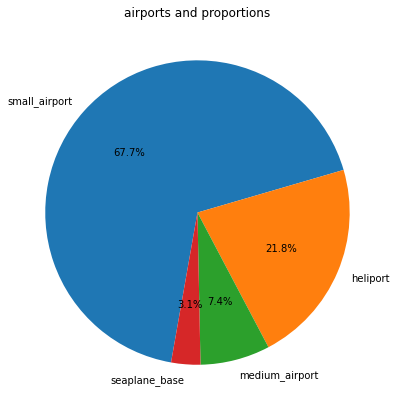

<Figure size 432x288 with 0 Axes>

In [3]:
# Visualize proportions for each airports
plt.figure(figsize=(7,7))
plt.pie((df.type.value_counts()/ df.shape[0]).values, labels=(df.type.value_counts()/ df.shape[0]).index, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('airports and proportions')
plt.show()
plt.savefig('/users/taehyun/Dropbox/Springboard/Projects/airport-codes/images/number_airports_each_type.jpeg',bbox_inches='tight') 

In [4]:
(df.type.value_counts()/ df.shape[0]).index

Index(['small_airport', 'heliport', 'medium_airport', 'seaplane_base'], dtype='object')

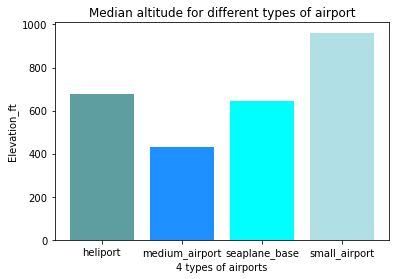

<Figure size 432x288 with 0 Axes>

In [5]:
# creating plot for median values for each median values.
x = np.arange(4)
types = df.groupby(['type'])['elevation_ft'].median().index
values = df.groupby(['type'])['elevation_ft'].median().values
colors = ['cadetblue', 'dodgerblue', 'aqua','powderblue']

plt.bar(x, values, color=colors)
plt.title('Median altitude for different types of airport')
plt.ylabel('Elevation_ft')
plt.xlabel('4 types of airports')
plt.xticks(x, types)
plt.show()
plt.savefig('/users/taehyun/Dropbox/Springboard/Projects/airport-codes/images/median_altitude.jpeg',bbox_inches='tight') 

In [6]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1,len(data)+1)/len(data)
    return x,y

In [7]:
def ecdf_plot_elevation_ft(data):
    plt.figure(figsize=(10,10))
    for i in range(len(mean_df_f)):
        hx,hy = ecdf(df['elevation_ft'][df.type == data.airport[i]])
        plt.plot(hx,hy,marker='.',linestyle='none')
    plt.title('ECDF plot of Elevation (ft) in heliport')
    plt.xlabel('Elevation in feat')
    plt.ylabel('% of heliport')
    plt.legend(data.airport)
    plt.margins(x=0.1)
    plt.show()
    
def boxplot(data):
    plt.figure(figsize=(10,10))
    sns.boxplot(x='type', y ='elevation_ft', data = data, hue ='type', width = 0.9, linewidth = 0.5)
    plt.title('type vs elevation_ft')
    plt.show()
    
def catplot(data):
    plt.figure(figsize=(10,10))
    sns.catplot(x = 'type', y= 'elevation_ft', data = df, hue = 'type', kind = 'box')
    
    
def onewayanova(data):
    fvalue, pvalue = stats.f_oneway(data['heliport'],data['small_airport'],
                                   data['seaplane_base'],
                                   data['medium_airport'])
    
    return fvalue, pvalue


def tukeyhsd(data):
    tukey = pairwise_tukeyhsd(endog=data['elevation_ft'],
                          groups=data['type'],
                          alpha=0.05)
    return tukey
    
def correlation_numeric(type1, type2):
    col1, col2 = type1, type2
    corr = df[type1].corr(df[type2])
    print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))
    
def visualizecorrelation(data):
    df_corr = round(data[['elevation_ft','Longitude','Latitude']],2).corr()
    corr_hm = sns.heatmap(df_corr, annot = True)
    corr_hm.set(title = "correlation map")
    plt.show()


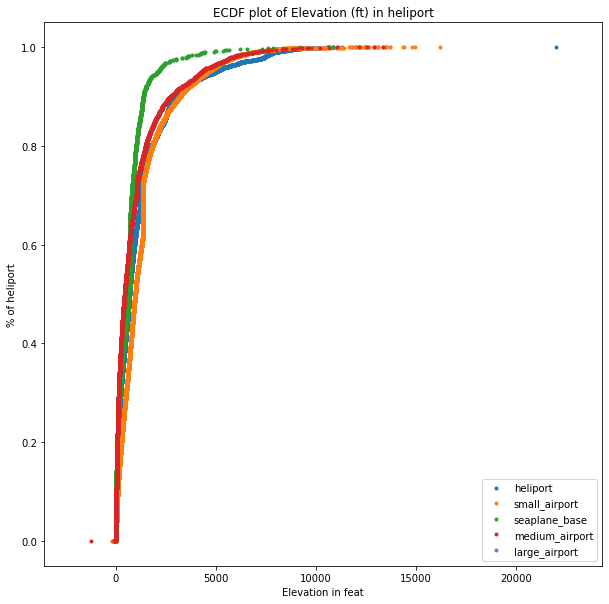

<Figure size 432x288 with 0 Axes>

In [8]:
ecdf_plot_elevation_ft(mean_df_f)
plt.savefig('/users/taehyun/Dropbox/Springboard/Projects/airport-codes/images/ECDF.jpeg',bbox_inches='tight') 

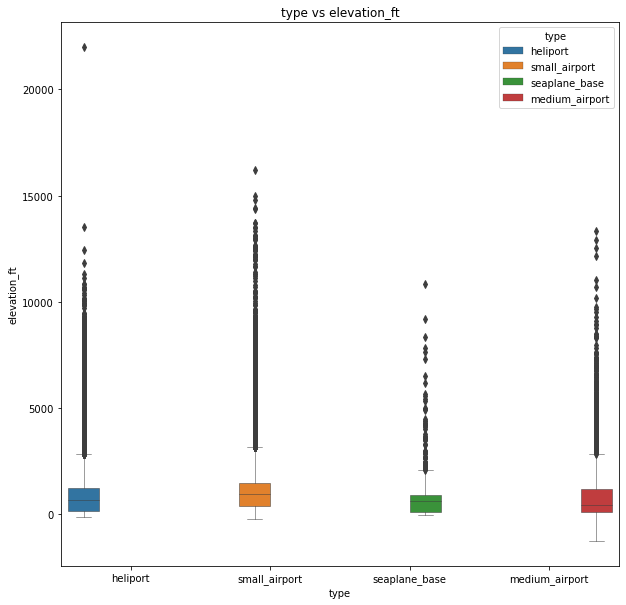

In [9]:
boxplot(df)

How come smaller airport are built in higher elevation feet? Are heliport, seaplane_base, and balloon port considered as small or large airports? 
But first, I want to see what kind of airports are mostly seen in each continents. We can have multiple assumptions about this. Probably because of the weather? Or is it just because it's hard to build big airports in a higher elevation height? Both of these assumptions makes sense bet let's dig deeper to know better



<Figure size 720x720 with 0 Axes>

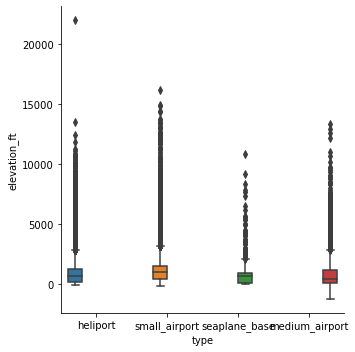

In [10]:
catplot(df)

I see that balloonport has too less data and since I sampled the data, balloon port has high elevation feet.

Now we will prepare to perform an one way ANOVA to prove the mean values have statistical difference between all groups

In [11]:
df.groupby(by = ['type','continent'])['continent'].count().sort_values(ascending = False)

type            continent
small_airport   NA           15651
heliport        NA            7110
small_airport   SA            6100
                EU            3923
                OC            2362
                AF            1893
heliport        SA            1622
small_airport   AS            1459
seaplane_base   NA            1146
medium_airport  NA            1110
heliport        EU             848
medium_airport  EU             692
                AS             544
                SA             398
                AF             319
                OC             307
heliport        OC             302
                AS             281
small_airport   A              187
                CA             140
seaplane_base   EU             134
medium_airport  A               88
seaplane_base   AS              74
heliport        A               40
seaplane_base   AF              35
                OC              24
                SA              23
small_airport   AN           

In [12]:
def sample(airport):
    airport_sample = [np.random.choice(df[df['type']== airport]['elevation_ft'], 30).mean() for i in range(1000)]
    return airport_sample

sample_airport_df = pd.DataFrame({'heliport':sample('heliport'),'small_airport': sample('small_airport'),
                                 'seaplane_base':sample('seaplane_base'), 
                                  'medium_airport':sample('medium_airport')
})

sample_airport_df

,heliport,small_airport,seaplane_base,medium_airport
0,1125.604377,1373.074853,564.088935,1153.533333
1,939.529517,1258.268566,910.250035,882.966667
2,1138.325140,1495.547806,581.672234,765.488639
3,911.621323,1278.562279,716.366736,1365.144320
4,1680.200000,1716.941520,900.577801,1458.600000
...,...,...,...,...
995,1416.991807,930.087426,714.438969,778.344320
996,1158.645903,1195.674853,561.855602,916.966667
997,1125.591807,981.487426,724.150104,971.366667
998,1620.237710,1473.914473,861.300069,1108.100000


Bootstrap 1000 times and pick 30 samples each we need mean distribution to perform the anova test.

In [13]:
df_melt = pd.melt(sample_airport_df, var_name='type', value_name='elevation_ft')
df_melt

,type,elevation_ft
0,heliport,1125.604377
1,heliport,939.529517
2,heliport,1138.325140
3,heliport,911.621323
4,heliport,1680.200000
...,...,...
3995,medium_airport,778.344320
3996,medium_airport,916.966667
3997,medium_airport,971.366667
3998,medium_airport,1108.100000


In [14]:
onewayanova(sample_airport_df)

(1126.7622885953988, 0.0)

We see that the pvalue is less than 0.05 meaning we reject the null hypothesis.

But I want to see one more time to make sure how each groups are statistically different from each other.

This time, I will perform a different test: Tukeyhsd.

Equal sample size : Tukey's HSD Unequal sample size: Yukey's Kramer method

In [15]:
print(tukeyhsd(df_melt))
plt.savefig('/users/taehyun/Dropbox/Springboard/Projects/airport-codes/images/Tukeyhsd.jpeg',bbox_inches='tight') 

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1         group2      meandiff p-adj   lower     upper   reject
------------------------------------------------------------------------
      heliport medium_airport  -198.378  -0.0 -228.0458 -168.7103   True
      heliport  seaplane_base -483.7179  -0.0 -513.3856 -454.0501   True
      heliport  small_airport  150.2738  -0.0   120.606  179.9415   True
medium_airport  seaplane_base -285.3398  -0.0 -315.0076 -255.6721   True
medium_airport  small_airport  348.6518  -0.0   318.984  378.3195   True
 seaplane_base  small_airport  633.9916  -0.0  604.3239  663.6594   True
------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

Great! Thus, we would conclude that there is a statistically significant difference between the means of all groups.

In [16]:
correlation_numeric('elevation_ft', 'Latitude')
correlation_numeric('elevation_ft', 'Longitude')
correlation_numeric('Longitude', 'Latitude')
df_corr = round(df[['elevation_ft','Longitude','Latitude']],2).corr()
df_corr

Correlation between  elevation_ft  and  Latitude is:  -0.09
Correlation between  elevation_ft  and  Longitude is:  -0.03
Correlation between  Longitude  and  Latitude is:  -0.39


,elevation_ft,Longitude,Latitude
elevation_ft,1.000000,-0.026343,-0.085396
Longitude,-0.026343,1.000000,-0.389576
Latitude,-0.085396,-0.389576,1.000000


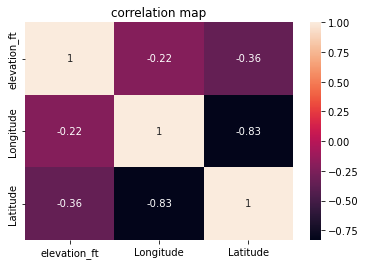

<Figure size 432x288 with 0 Axes>

In [17]:
visualizecorrelation(df_corr)
plt.savefig('/users/taehyun/Dropbox/Springboard/Projects/airport-codes/images/corr_chart.jpeg',bbox_inches='tight') 

Since Longitude and Latitude are highely negatively correlated, it's not good to include both of the column for training the model. It will just increase the complexitiy of the algorithm, thus increasing the risk of errors.

Therefore, we can drop one of the column Longitude or Latitude and save the data

In [18]:
df.drop(['Latitude'], axis = 1, inplace = True)

In [19]:
df.to_csv('df_modeling.csv')